In [28]:
#Step (1): Read Data
import pandas as pd #Read data
import numpy as np  #Array

# Read in dataset (encoding = 'Big5'可顯示出繁體中文)
data_train = pd.read_excel("01train.xlsx")
data_train.head() # Show data (看看是否讀取成功)

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
0,58.785714,63.833333,43.213333,231.000000,0.039474,61.255411,3,0.053652,-0.037180,6235.000000,6029.000000,0,0.999244,1,0
1,52.357143,57.857143,58.053333,92.090000,0.732759,91.393846,4,0.074205,0.155243,1750.000000,1422.000000,0,0.950294,2,1
2,30.674860,36.714286,36.661527,836.239303,0.229050,68.931202,3,0.121504,0.031717,2679.476981,2200.824592,0,1.000000,1,0
3,32.119048,41.571429,63.213333,588.800000,0.090909,54.455267,3,0.153716,0.009326,362.900000,0.000000,0,0.918970,1,1
4,41.214286,49.404762,52.486667,683.900000,0.072727,61.922799,3,0.097287,-0.030090,2777.000000,2001.000000,0,0.906411,1,0


In [29]:
data_train.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000
mean,38.984541,45.294944,52.784871,656.507337,0.225864,75.190124,3.319754,0.109481,0.015342,2553.566565,2209.062206,0.297463,0.833713,1.319754,0.428132
std,14.540574,15.546263,64.786127,717.237752,0.232311,14.008806,0.684632,0.090865,0.125137,1829.663990,1810.428997,0.572666,12.506317,0.684632,0.494871
min,7.902370,8.047619,2.562656,-8000.000000,0.000000,47.889610,3.000000,0.003690,-1.043000,0.675070,0.000000,0.000000,-600.000000,1.000000,0.000000
25%,28.642857,34.880952,43.504429,224.700000,0.030303,62.761544,3.000000,0.058475,-0.055860,948.100000,579.800000,0.000000,0.802960,1.000000,0.000000
50%,38.976190,47.023810,53.053333,413.100000,0.142857,76.677489,3.000000,0.085307,0.005701,2276.000000,1898.000000,0.000000,0.937191,1.000000,0.000000
75%,50.119048,57.345238,60.650000,834.969651,0.371429,86.821260,3.000000,0.143723,0.078966,3839.552040,3455.073327,1.000000,0.987258,1.000000,1.000000
max,75.619048,79.547619,4000.000000,4412.000000,0.966667,100.000000,6.000000,1.776212,1.208233,8410.000000,8129.000000,5.000000,500.000000,4.000000,1.000000


In [30]:
# Appendix: Data preprocessing (程式供參考用)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #建構standardization的物件

#name_list_outlier = ['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標',
                #'手機電池電量','手機外殼/包膜指標','外型平均曲率','上網頻率指標',
                #'通話頻率指標','新機/二手/老舊','內容容量比率','CPU效能等級']

name_list_outlier =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']
name_pre_outlier = ['Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Mobile Phone Battery Level','Content Capacity Ratio']


#離群值處理
def  outlier_del(data_frame,name_list_outlier,n1=5,n2=5):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1

        # 定义离群值范围
        lower_bound = Q1 - n1 * IQR
        upper_bound = Q3 + n2 * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame

data_train=outlier_del(data_train,['手機螢幕溫度(平均)'],n1=5,n2=5)
data_train=outlier_del(data_train,['手機背蓋溫度(平均)'],n1=1,n2=1)
data_train=outlier_del(data_train,['上網頻率指標'],n1=5,n2=0.01)
data_train.describe()


手機螢幕溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機背蓋溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3619,)
上網頻率指標
Shape Of The Before Ouliers:  (3619,)
Shape Of The After Ouliers:  (2728,)


,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000
mean,36.845592,43.531691,53.860392,497.226827,0.220587,74.278284,3.265396,0.112409,0.018526,1859.551501,1515.253478,0.340543,0.634775,1.265396,0.464443
std,13.667884,14.617112,11.074951,377.458265,0.228002,13.909850,0.614533,0.095233,0.125646,1117.569963,1110.984486,0.616553,11.505298,0.614533,0.498826
min,8.942242,10.071429,26.605459,2.806544,0.000000,47.889610,3.000000,0.009940,-1.043000,0.812024,0.000000,0.000000,-600.000000,1.000000,0.000000
25%,26.750523,33.107143,45.650000,220.850720,0.028908,60.637626,3.000000,0.061169,-0.058080,877.600000,478.878030,0.000000,0.786327,1.000000,0.000000
50%,35.833333,42.571429,54.853333,380.378693,0.137931,75.721501,3.000000,0.088161,0.009827,1753.500000,1452.000000,0.000000,0.927595,1.000000,0.000000
75%,46.476190,54.476190,61.520000,685.091851,0.364865,85.406243,3.000000,0.146683,0.086680,2797.390119,2458.807408,1.000000,0.982953,1.000000,1.000000
max,75.619048,79.547619,77.666667,2166.000000,0.966667,99.999335,6.000000,1.776212,1.208233,3981.163882,3809.000000,5.000000,1.000000,4.000000,1.000000


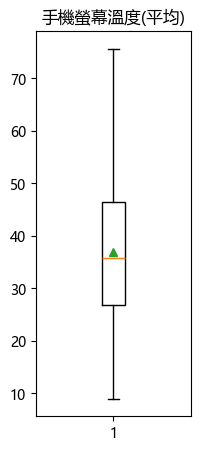

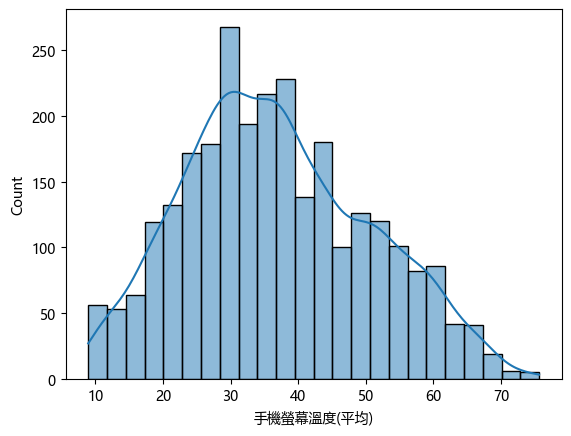

偏態(Skewness): 0.29
峰度(Kurtosis): -0.54


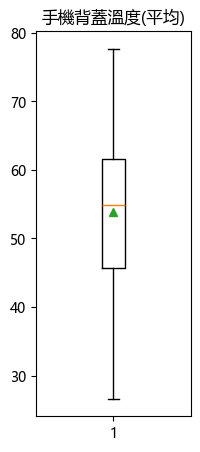

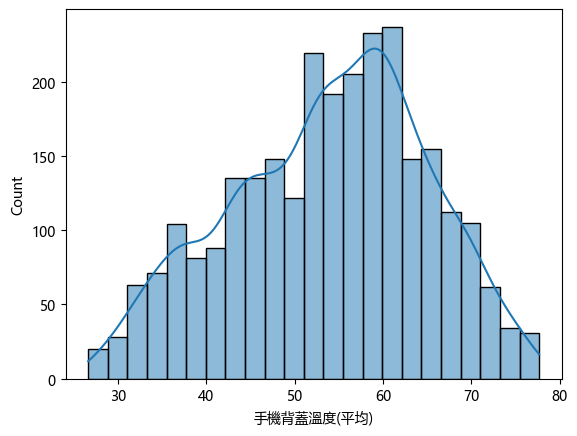

偏態(Skewness): -0.25
峰度(Kurtosis): -0.62


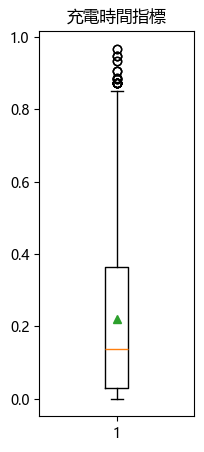

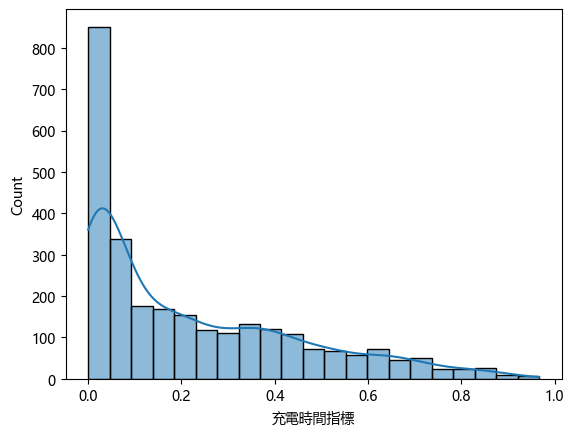

偏態(Skewness): 1.03
峰度(Kurtosis): 0.13


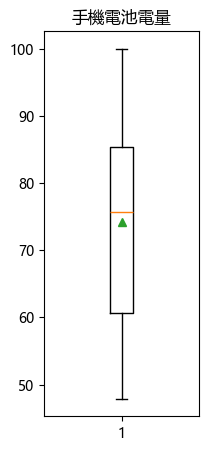

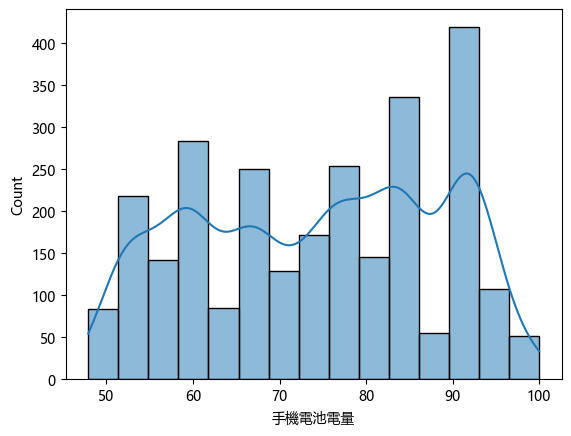

偏態(Skewness): -0.11
峰度(Kurtosis): -1.23


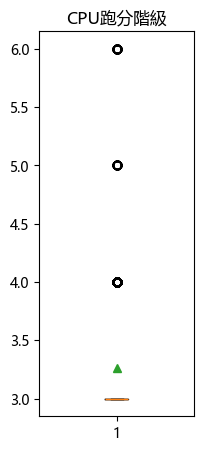

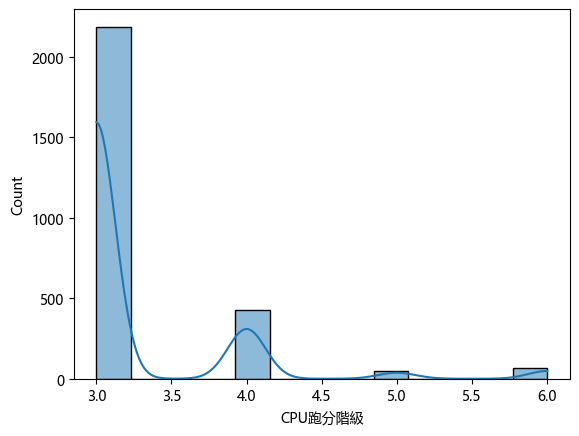

偏態(Skewness): 2.76
峰度(Kurtosis): 8.04


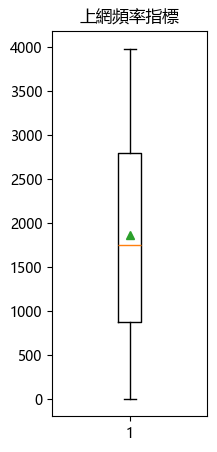

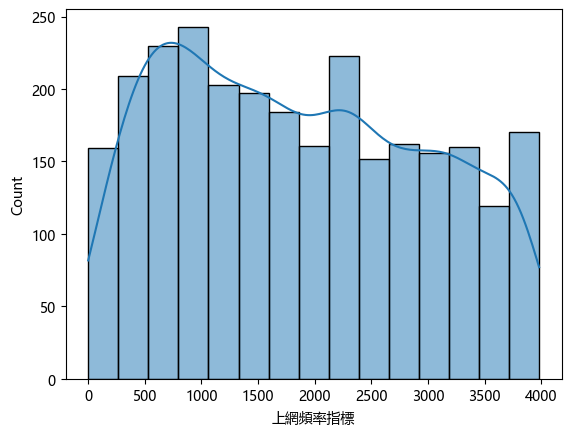

偏態(Skewness): 0.20
峰度(Kurtosis): -1.13


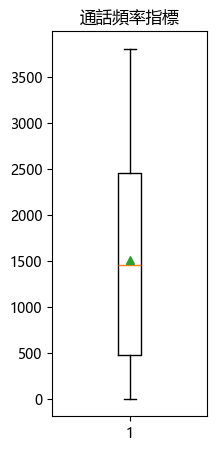

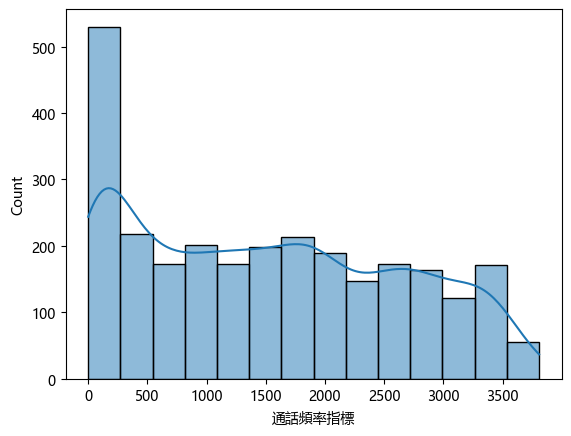

偏態(Skewness): 0.24
峰度(Kurtosis): -1.17


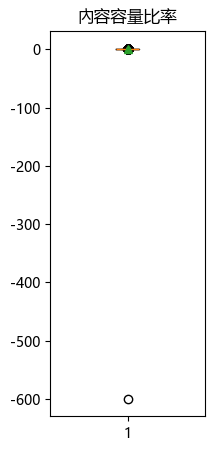

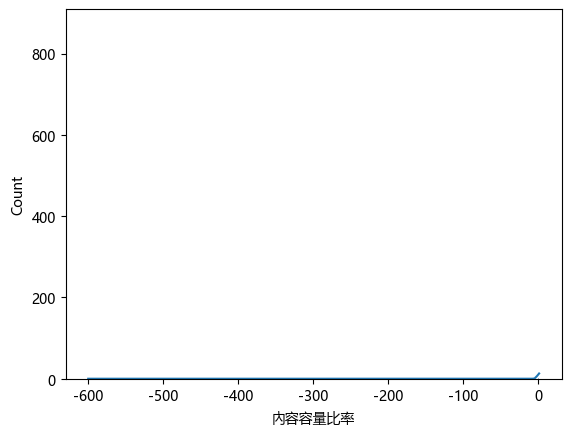

偏態(Skewness): -52.21
峰度(Kurtosis): 2726.73


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False

def box_graph(data_frame,name_list):
    for i in range(len(name_list)):
        plt.figure(figsize=(2,5))
        plt.boxplot(data_frame[name_list[i]],showmeans=True)   
        plt.title(name_list[i])
        plt.show()
        sns.histplot(data_frame[name_list[i]], kde=True)
        plt.show()
        print("偏態(Skewness): {:.2f}".format(data_frame[name_list[i]].skew()))
        print("峰度(Kurtosis): {:.2f}".format(data_frame[name_list[i]].kurt()))
        print('==================================================================================================')
box_graph(data_train,name_list_outlier)


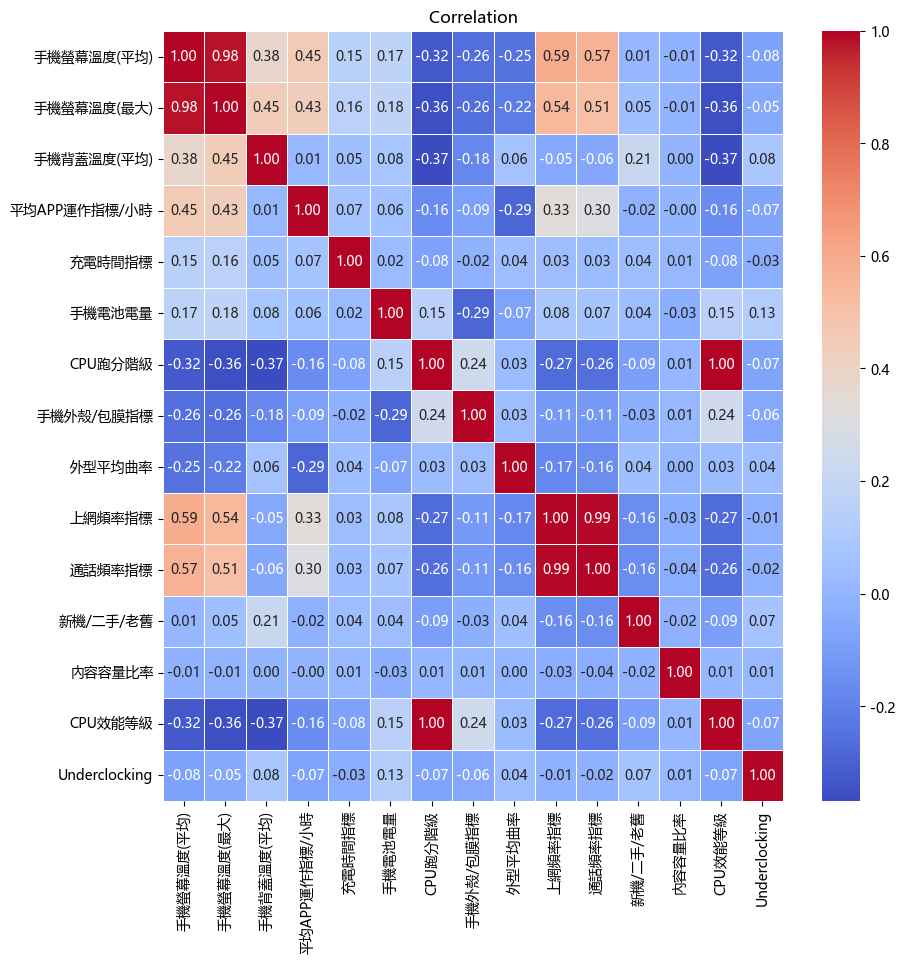

In [32]:

def corr_matrix_graph(data_frame):
    corr_matrix = data_frame.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f') #各參數代表的意思請查閱seaborn.heatmap官網的說明
    plt.title(' Correlation ')
    plt.show()
    
corr_matrix_graph(data_train)

In [33]:
#Step (3): 用X儲存features, Y為labels(Underclocking)
y_data = data_train['Underclocking'].to_numpy()
feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']
x_data = data_train[feature_ex].to_numpy()


#正規化
def data_normalized(data):
    min_max_scaler = MinMaxScaler()
    data_normalized = min_max_scaler.fit_transform(data)
    return data_normalized
def data_standardized(data):
    standard_scaler = StandardScaler()
    data_standardized = standard_scaler.fit_transform(data)
    return data_standardized 
x_data=data_normalized(x_data)
x_data=data_standardized(x_data)
print(x_data) 
print(y_data) 

[[ 1.13509845  0.37866626  2.24675537 ... -0.0980445  -0.08395309
   0.02742881]
 [-0.45155954 -1.55323642  0.03712503 ...  0.73380265  0.61719746
   0.03174991]
 [-0.34587732  0.84466794 -0.56886247 ... -1.33944714 -1.36413361
   0.02470575]
 ...
 [-1.27035466  0.44489389 -0.86681145 ... -1.38321081 -1.26987559
   0.02971775]
 [-1.29962571 -1.10423058  0.18674579 ... -1.57596786 -1.36413361
   0.02215034]
 [ 0.27090553  0.36903315  0.42428609 ...  1.54689679  1.56173608
   0.00821695]]
[1 0 1 ... 0 0 0]


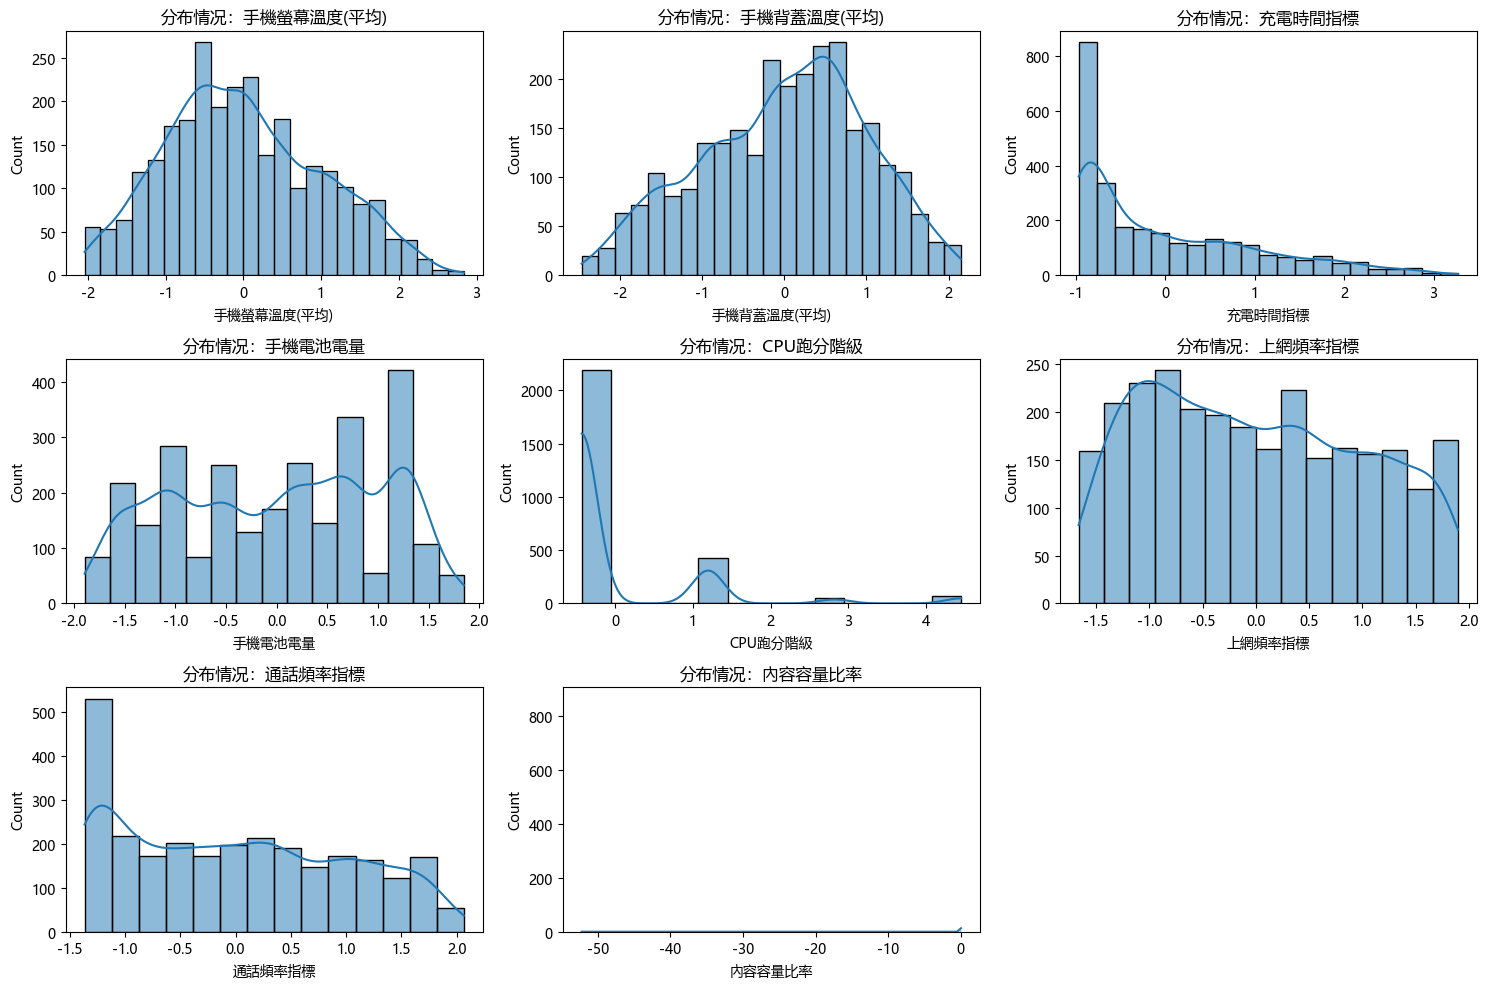

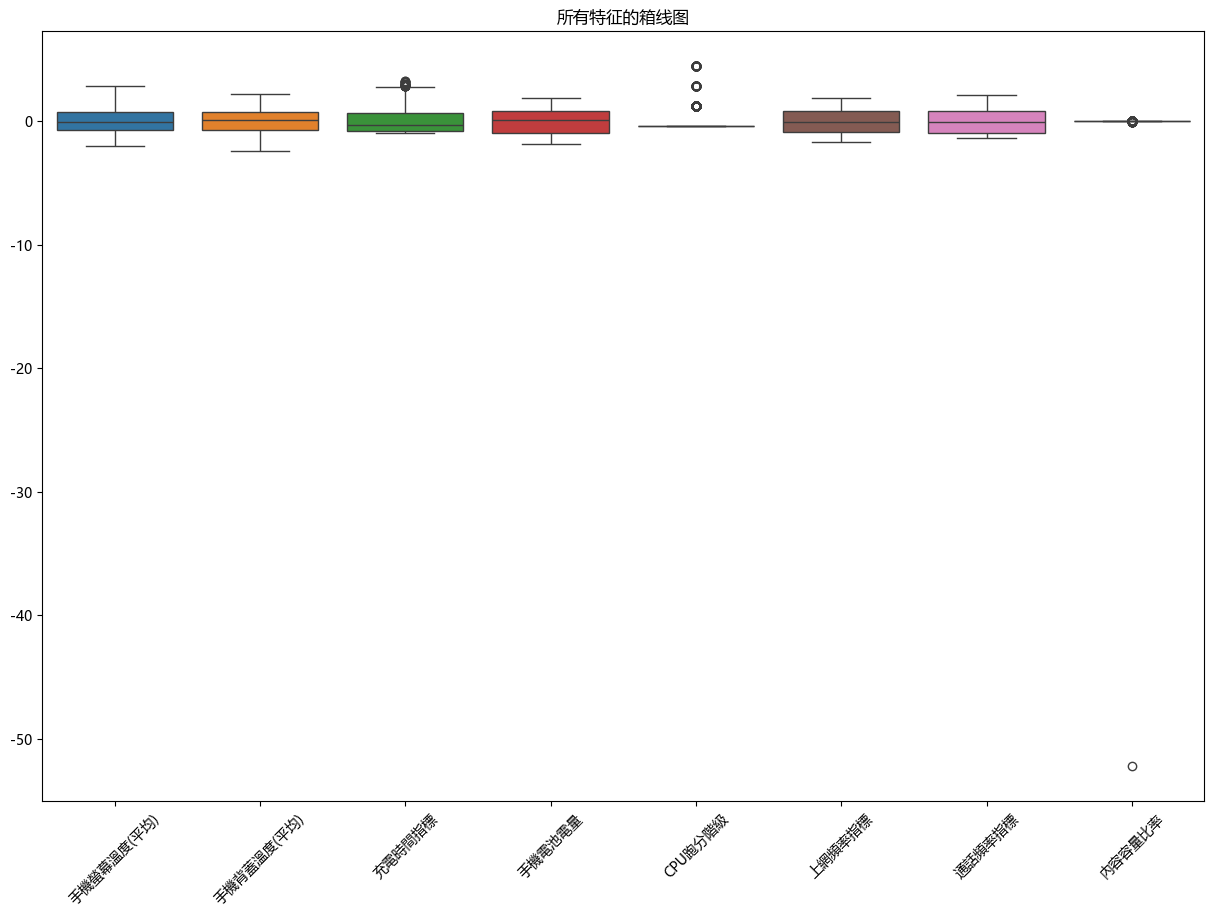

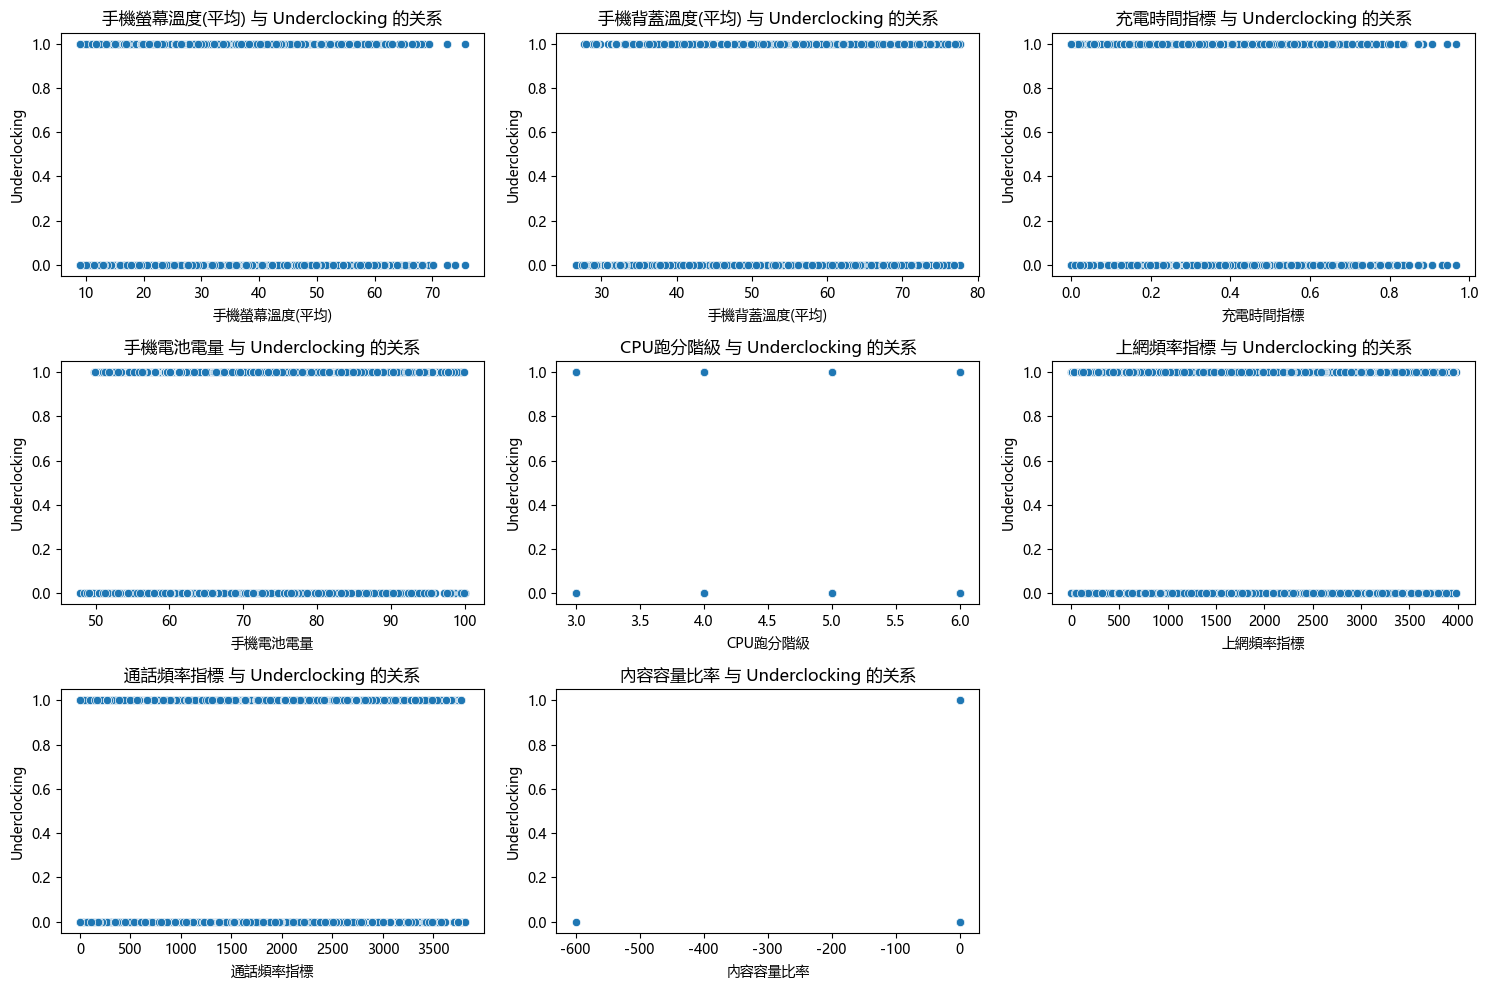

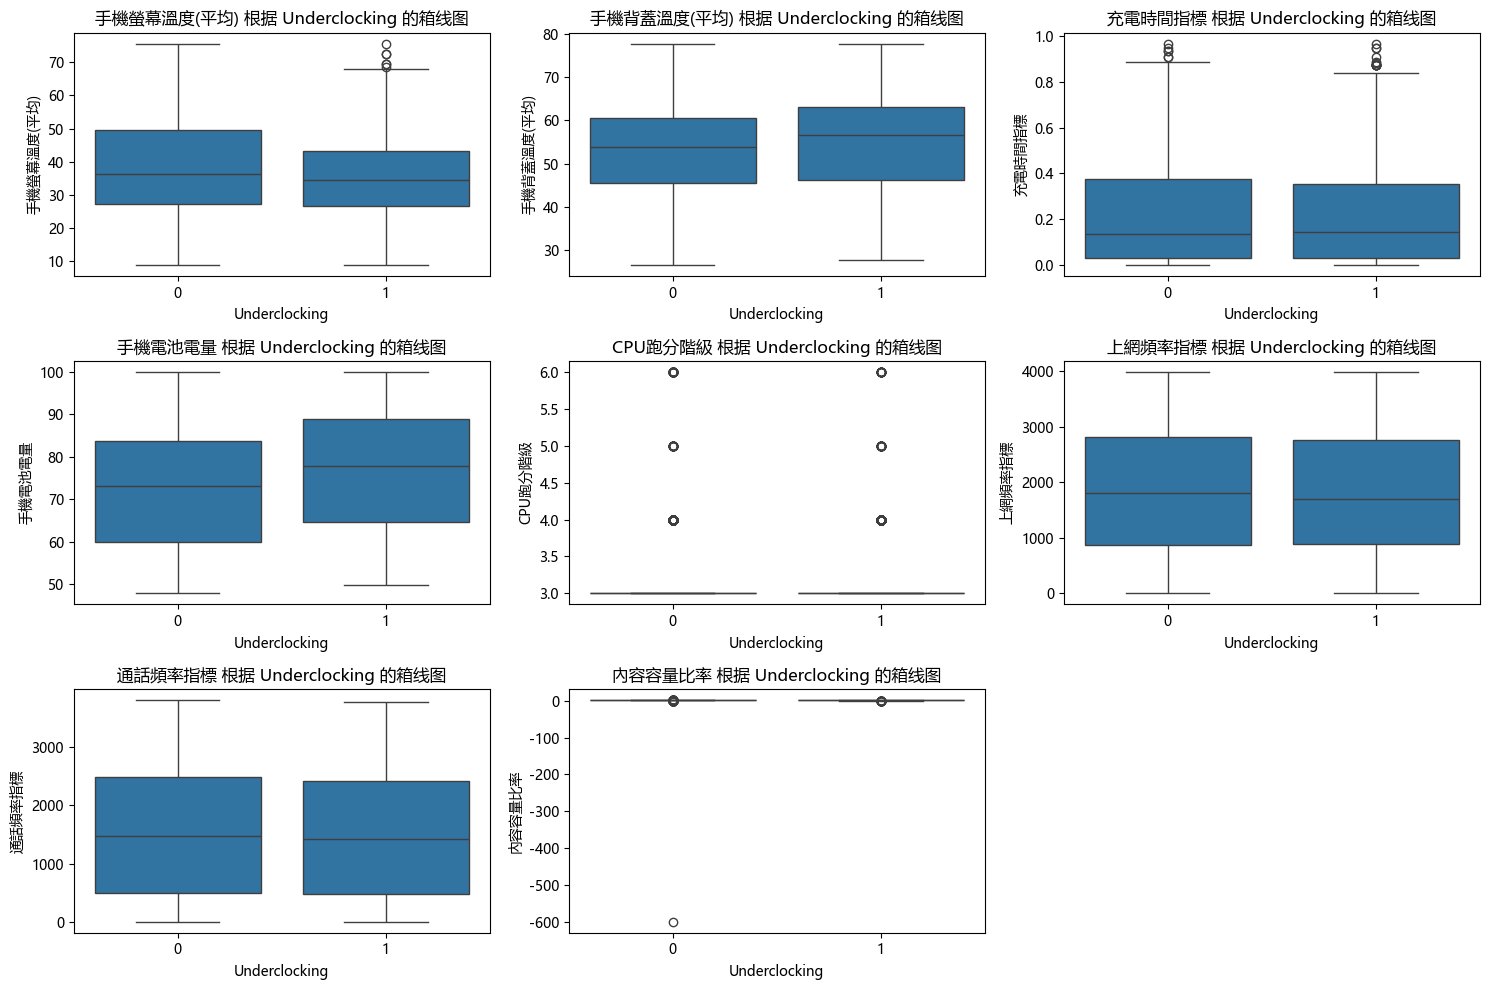

In [34]:
def feature_matrix_numpy(data, feature_ex):
    data_df = pd.DataFrame(data, columns=feature_ex)

    # 绘制每个特征的直方图
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_ex):
        plt.subplot(3, 3, i + 1)  # 根据特征数量调整网格大小
        sns.histplot(data_df[feature], kde=True)
        plt.title(f'分布情况：{feature}')
    plt.tight_layout()
    plt.show()

    # 绘制所有特征的箱线图
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=data_df)  # 正确使用 data_df
    plt.xticks(rotation=45)
    plt.title('所有特征的箱线图')
    plt.show()

def feature_target_relationship_dataframe(data, feature_ex, target_feature):

    # 每个特征与目标特征的散点图
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_ex):
        plt.subplot(3, 3, i + 1)  # 根据特征数量调整网格大小
        sns.scatterplot(x=data[feature], y=data[target_feature])
        plt.title(f'{feature} 与 {target_feature} 的关系')
    plt.tight_layout()
    plt.show()

    # 每个特征与目标特征的箱线图
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_ex):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x=data[target_feature], y=data[feature])
        plt.title(f'{feature} 根据 {target_feature} 的箱线图')
    plt.tight_layout()
    plt.show()

#===========================================================================
feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']
feature_matrix_numpy(x_data, feature_ex)  
feature_target_relationship_dataframe(data_train, feature_ex, 'Underclocking')  


In [35]:
#Step (4): 把dataset分成訓練跟驗證
from sklearn.model_selection import train_test_split
#test_size=0.3 為比例-> training:test=7:3
trainX, testX, trainY, testY = train_test_split(x_data, y_data, test_size=0.15, random_state=42)

In [39]:
from xgboost import XGBClassifier
import numpy as np 
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=10000, 
                             learning_rate= 0.01,
                             max_depth=5,
                             gamma=5)
# 使用訓練資料訓練模型
xgboostModel.fit(trainX, trainY)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(testX)
print('訓練集: ',xgboostModel.score(trainX,trainY))
print('測試集: ',xgboostModel.score(testX,testY))

訓練集:  0.7540983606557377
測試集:  0.7097560975609756


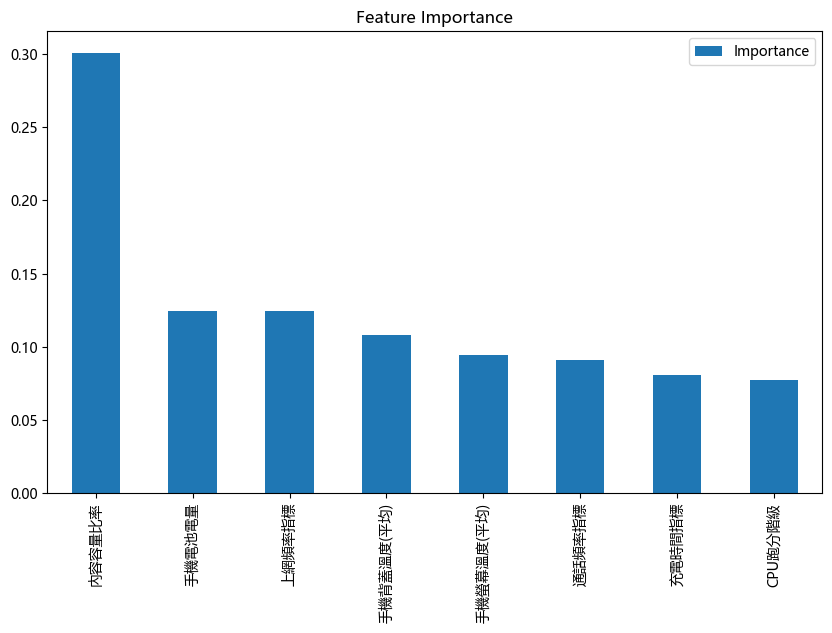

In [40]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False
importances = xgboostModel.feature_importances_
features = feature_ex
importance_df = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values('Importance', ascending=False)
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

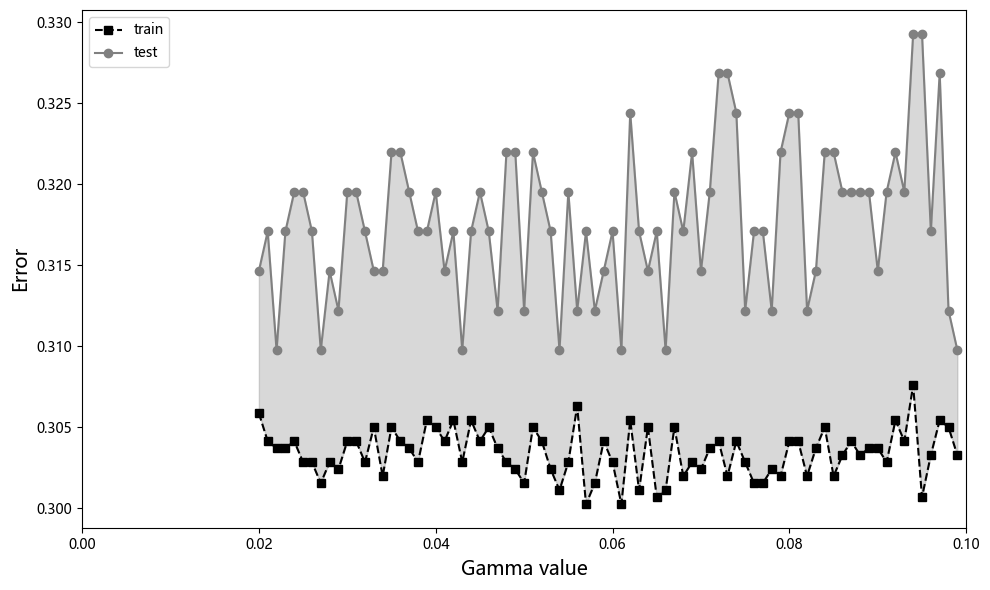

In [44]:


def xgboostModel_fun(n=10000, lr=0.01, maxdepth=3, g=10):
    xgboostModel = XGBClassifier(n_estimators=n, 
                                 learning_rate=lr,
                                 max_depth=maxdepth,
                                 gamma=g)
    return xgboostModel

otrn = []
otst = []
change = 0.1
divisors = np.arange(0.02, change, 0.001)  # 这样 divisors 就与 otrn 和 otst 长度一致

for g in divisors:
    tree = xgboostModel_fun(lr=g) 
    tree.fit(trainX, trainY) 
    otrn.append(1 - tree.score(trainX, trainY)) 
    otst.append(1 - tree.score(testX, testY))

fig, ax = plt.subplots()
fig.set_size_inches((10, 6))
_=ax.plot(divisors, otrn, '--s', label='train', color='k')
_=ax.plot(divisors, otst, '-o', label='test', color='gray')
_=ax.fill_between(divisors, otrn, otst, color='gray', alpha=.3)
_=ax.legend(loc=0)
_=ax.set_xlabel('Gamma value', fontsize=14)  # 更正 x 轴标签
_=ax.set_ylabel('Error', fontsize=14)
_=ax.axis(xmin=0, xmax=change)  # xmax 为 change
fig.tight_layout()


In [46]:
from sklearn.model_selection import GridSearchCV

def xgboost_model_tuning(trainX, trainY):
    # 定义模型
    model = XGBClassifier(n_estimators=10000, max_depth=3)

    # 设置参数网格
    param_grid = {
        'gamma': np.arange(0, 5, 0.1),  # 探索 gamma 值从 0 到 0.1，步长为 0.01
        'learning_rate': np.arange(0, 0.1, 0.01)  # 同时探索不同的学习率
    }

    # 创建 GridSearchCV 对象
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,
                               scoring='accuracy', verbose=1, n_jobs=-1)

    # 运行网格搜索
    grid_search.fit(trainX, trainY)

    # 打印最佳参数和最佳模型的得分
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

    return grid_search

# 假设 trainX 和 trainY 已经是预处理好的训练数据
# 使用 trainX, trainY 调用函数
grid_search_result = xgboost_model_tuning(trainX, trainY)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best parameters: {'gamma': 0.4, 'learning_rate': 0.08}
Best cross-validation score: 0.71


In [ ]:


# 读取测试数据
data_test = pd.read_excel("01test.xlsx")
test_id = data_test.pop('id')  
data_test=data_test[feature_ex]
# 假设 data_normalized 和 data_standardized 已正确定义
data_test = data_normalized(data_test)
data_test = data_standardized(data_test)

# 使用xgboost模型进行预测
predicted_ans = xgboostModel.predict(data_test)  # 确保这里使用的是正确处理后的测试数据

# 创建提交DataFrame
my_submission = pd.DataFrame({'id': test_id, 'Underclocking': predicted_ans})
my_submission.to_csv('submission.csv', index=False)
